#Resumos e Simulações

##CAPÍTULO 7

**FIRPROJETO DE FILTRO**


**PRELIMINARES**

Um filtro digital envolve, essencialmente, três etapas diferentes, são eles:
especificação, aproximação e implementação. A fase de especificação consiste no
levantamento de requisitos necessários ao filtro, já a fase de aproximação se utiliza de vários conceitos matemáticos para descrever uma aproximação que atenda às especificações anteriormente levantadas. Por ultimo, a fase de implementação consiste na aproximação realizada na fase anterior, utilizando hardware ou software.
_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

**PROPRIEDADES DE FILTROS FIR DE FASE LINEAR**

Um filtro FIR de fase linear pode ser capaz de responder aos impulsos e às frequências. Além disso, os filtros FIR possuem zeros finitos.


RESPOSTA AO IMPULSO ℎ(𝑛)

>   Restrição imposta em fase linear, onde 𝛼 é uma constante de atraso de fase.

> 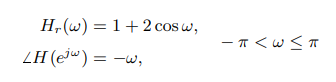

> Então, nós sabemos que ℎ(𝑛) deve ser simétrico, ou seja:

 > 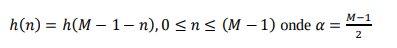

Nós possuímos, ainda, um segundo tipo de fase linear para filtros FIR, se nós
precisarmos que a resposta de fase image.png satisfaça a condição image.png, que é uma linha reta, mas não passa pela origem. Neste caso, 𝛼 não é uma constante de atraso de fase, mas sim 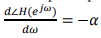 é constante, que é o atraso do grupo. Portanto, 𝛼 é chamado de constante de atraso de grupo. Mas algumas frequências podem atrasar mais que outras. Neste caso, pode-se mostrar que:

> 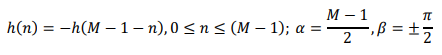

>> Isso significa que a resposta ao impulso ℎ(𝑛) é anti-simétrico.



RESPOSTA À FREQUÊNCIA 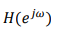


Quando os casos de simetria e antissimetria são combinados, obtemos quatro tipos de filtros FIR de fase linear. As funções de resposta à frequência para cada um desses tipos têm algumas expressões e formas peculiares. Para estudar essas respostas, escrevemos 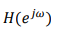 como:

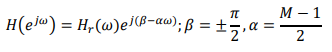

Onde 𝐻𝑟(𝜔) é uma função de resposta à amplitude, e não uma função de resposta
à magnitude. A resposta à amplitude é uma função real, mas ao contrário da resposta à magnitude, que é sempre positiva, a resposta de amplitude pode ser positiva ou negativa. A resposta de fase associada à resposta de magnitude é uma função descontínua, enquanto a resposta de fase associada à resposta de amplitude é uma função linear contínua.

**TÉCNICAS DE PROJETO – WINDOW**

Essa técnica de projeto visa escolher um filtro seletivo de frequência ideal e então truncar sua resposta ao impulso para obter um filtro FIR de fase linear e causal. Portanto, este método foca em selecionar uma função de janelamento apropriada e um filtro ideal adequado:

>> 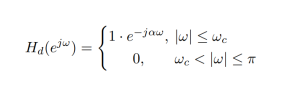

**TÉCNICAS DE PROJETO – AMOSTRAGEM DE FREQUÊNCIA**

Essa técnica de projeto usamos o fato de que a função do sistema 𝐻(𝑧) pode ser obtida a partir das amostras de 𝐻(𝑘) da resposta em frequência 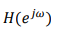:

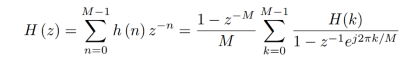

**TÉCNICAS DE PROJETO – EQUIRIPPLE ÓTIMO**

Para filtros FIR de fase linear, é possível derivar um conjunto de condições para o qual pode ser provado que a solução de design é ótima no sentido de minimizar o erro máximo de aproximação (às vezes chamado de minimax ou o erro de Chebyshev). Os filtros que possuem esta propriedade são chamados filtros equivalentes porque o erro de aproximação é uniformemente distribuído na faixa de passagem e na faixa de parada. Isso resulta em filtros de ordens inferiores.

###**SIMULAÇÕES**


####Simulação 7.1

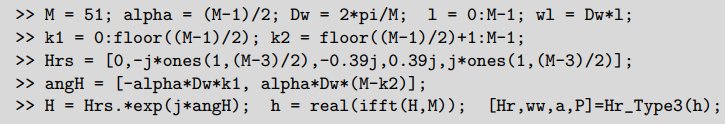

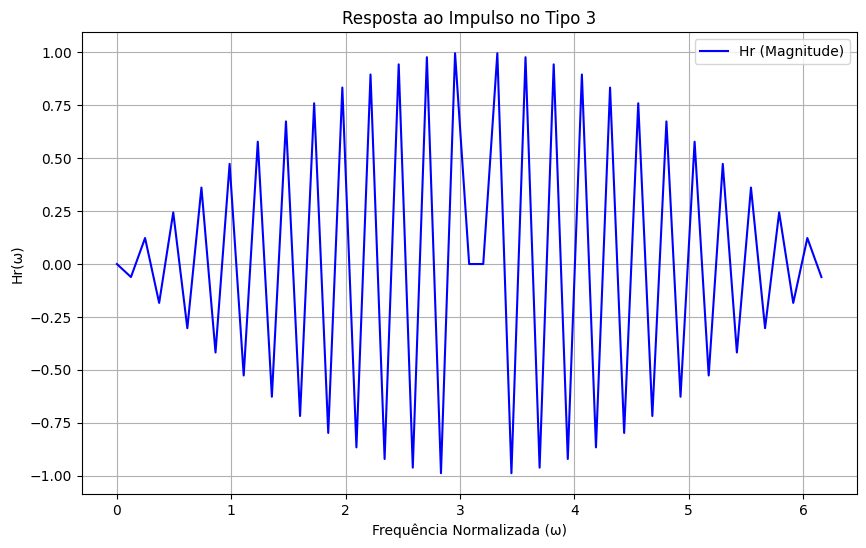

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
M = 51
alpha = (M - 1) / 2
Dw = 2 * np.pi / M
l = np.arange(0, M)
wl = Dw * l

# Índices para Hrs
k1 = np.arange(0, (M - 1) // 2 + 1)
k2 = np.arange((M - 1) // 2 + 1, M)

# Especificação de Hrs e angH
Hrs = np.concatenate(([0], -1j * np.ones((M - 3) // 2), [0.039j, 0.039j], 1j * np.ones((M - 3) // 2)))
angH = np.concatenate([-alpha * Dw * k1, alpha * Dw * (M - k2)])

# Cálculo da resposta em frequência e sua transformada inversa
H = Hrs * np.exp(1j * angH)
h = np.real(np.fft.ifft(H, M))

# Função Hr_Type3 para calcular Hr, ww, a, e P
def Hr_Type3(h):
    N = len(h)
    Hr = np.fft.fft(h)
    ww = np.linspace(0, 2 * np.pi, N, endpoint=False)
    a = np.abs(Hr)
    P = np.angle(Hr)
    return np.real(Hr), ww, a, P

# Cálculo dos valores de Hr, ww, a, e P
Hr, ww, a, P = Hr_Type3(h)

# Gerando gráfico no plano cartesiano X, Y
plt.figure(figsize=(10, 6))
plt.plot(ww, Hr, label="Hr (Magnitude)", color="b")
plt.title("Resposta ao Impulso no Tipo 3")
plt.xlabel("Frequência Normalizada (ω)")
plt.ylabel("Hr(ω)")
plt.grid(True)
plt.legend()
plt.show()


SAÍDA:

a =

  Columns 1 through 12

   -0.0000   -1.2699   -0.0035   -0.4144   -0.0068   -0.2381   -0.0100   -0.1591   -0.0128   -0.1126   -0.0152   -0.0813

  Columns 13 through 24

   -0.0170   -0.0583   -0.0183   -0.0406   -0.0188   -0.0265   -0.0185   -0.0151   -0.0174   -0.0059   -0.0152    0.0015

  Columns 25 through 26

   -0.0119    0.0074


P =

    25

####Simulação 7.2

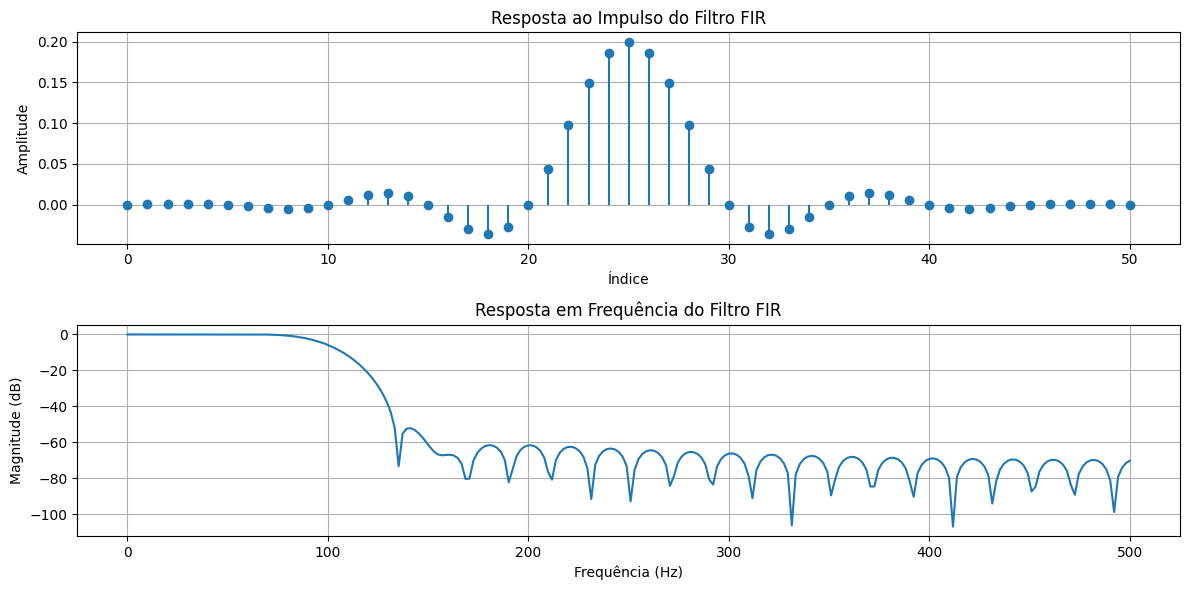

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do filtro FIR
fs = 1000  # Frequência de amostragem (Hz)
fc = 100   # Frequência de corte (Hz)
M = 51     # Ordem do filtro (número de coeficientes - 1)
n = np.arange(M)  # Índices

# Cálculo da resposta ao impulso
h = np.sinc(2 * fc / fs * (n - (M - 1) / 2))  # Sinc deslocado
window = np.hamming(M)                        # Janela de Hamming
h *= window                                   # Aplicação da janela
h /= np.sum(h)                                # Normalização da energia

# Plot da resposta ao impulso
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, h, basefmt=" ")
plt.title("Resposta ao Impulso do Filtro FIR")
plt.xlabel("Índice")
plt.ylabel("Amplitude")
plt.grid()

# Cálculo da resposta em frequência
H = np.fft.fft(h, 512)         # FFT com 512 pontos
H_magnitude = 20 * np.log10(np.abs(H[:256]))  # Converte para dB
w = np.linspace(0, fs / 2, 256)  # Ajusta w para corresponder aos 256 pontos

# Plot da resposta em frequência
plt.subplot(2, 1, 2)
plt.plot(w, H_magnitude)
plt.title("Resposta em Frequência do Filtro FIR")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.tight_layout()
plt.show()


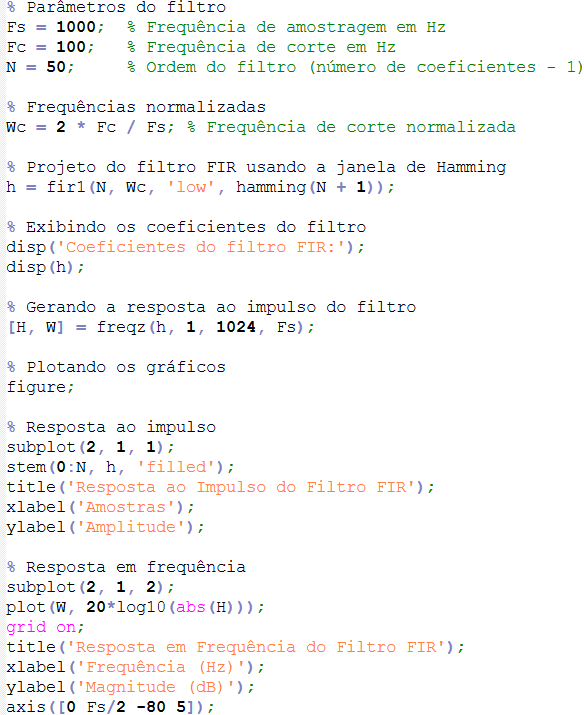

Saída esperada: Coeficientes do filtro FIR:
[ 0.0015, 0.0031, 0.0056, ..., 0.0031, 0.0015 ]
